In [3]:
import pandas as pd


dfPovertyData = pd.read_csv("FAOFP1990_2022.csv", sep=",")
dfPovertyData

,"Date ""Food.Price.Index"" ""Meat"" ""Dairy"" ""Cereals"" ""Oils"" ""Sugar"""
0,"1 ""01/01/1990"" 64.1 73.4 53.5 64.1 44.59 87.9"
1,"2 ""01/02/1990"" 64.5 76 52.2 62.2 44.5 90.7"
2,"3 ""01/03/1990"" 63.8 77.8 41.4 61.3 45.75 95.1"
3,"4 ""01/04/1990"" 65.8 80.4 48.4 62.8 44.02 94.3"
4,"5 ""01/05/1990"" 64.4 81 39.2 62 45.5 90.4"
...,...
385,"386 ""01/04/2022"" 158.4 121.9 146.7 169.7 237.5..."
386,"387 ""01/05/2022"" 158.1 122.9 144.2 173.5 229.2..."
387,"388 ""01/06/2022"" 154.7 125.9 150.2 166.3 211.8..."
388,"389 ""01/07/2022"" 140.7 124.6 146.5 147.3 168.8..."


In [41]:
new_data = dfPovertyData.iloc[:, 0].str.split(" ", expand=True)

# Atribuindo nomes às colunas
new_data.columns = ["index","Date", "Food Price Index", "Meat", "Dairy", "Cereals", "Oils", "Sugar"]

# Exibindo o novo DataFrame
new_data

,index,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
0,1,"""01/01/1990""",64.1,73.4,53.5,64.1,44.59,87.9
1,2,"""01/02/1990""",64.5,76,52.2,62.2,44.5,90.7
2,3,"""01/03/1990""",63.8,77.8,41.4,61.3,45.75,95.1
3,4,"""01/04/1990""",65.8,80.4,48.4,62.8,44.02,94.3
4,5,"""01/05/1990""",64.4,81,39.2,62,45.5,90.4
...,...,...,...,...,...,...,...,...
385,386,"""01/04/2022""",158.4,121.9,146.7,169.7,237.5,121.5
386,387,"""01/05/2022""",158.1,122.9,144.2,173.5,229.2,120.4
387,388,"""01/06/2022""",154.7,125.9,150.2,166.3,211.8,117.3
388,389,"""01/07/2022""",140.7,124.6,146.5,147.3,168.8,112.8


In [47]:
new_data['Date'] = new_data['Date'].str.replace('"', '') 
new_data['Date'] = pd.to_datetime(new_data['Date'], format='%d/%m/%Y')

In [53]:
new_data['ano'] = new_data['Date'].dt.year

In [55]:
new_data.head()

,index,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,ano
0,1,1990-01-01,64.1,73.4,53.5,64.1,44.59,87.9,1990
1,2,1990-02-01,64.5,76,52.2,62.2,44.5,90.7,1990
2,3,1990-03-01,63.8,77.8,41.4,61.3,45.75,95.1,1990
3,4,1990-04-01,65.8,80.4,48.4,62.8,44.02,94.3,1990
4,5,1990-05-01,64.4,81,39.2,62,45.5,90.4,1990


In [25]:
df_temp = pd.read_csv('average_temp_brazil.csv')
df_temp.head()

,UF,media,ano
0,RS,21.39,2000
1,RJ,23.14,2000
2,AM,27.29,2000
3,BA,26.32,2000
4,DF,21.57,2000


In [75]:
import pandas as pd

# Agrupando e calculando a média da coluna 'media' por ano
novo_df_temp = df_temp.groupby('ano')['media'].mean().reset_index()

# Renomeando as colunas para o novo dataframe
novo_df_temp.columns = ['ano', 'mediaBR']

# Exibindo o novo dataframe com as médias por ano
print(novo_df_temp)

     ano    mediaBR
0   2000  23.942000
1   2001  23.985000
2   2002  24.083000
3   2003  24.513500
4   2004  24.911429
5   2005  24.679091
6   2006  24.838696
7   2007  24.824167
8   2008  24.557692
9   2009  24.726923
10  2010  25.061111
11  2011  24.547407
12  2012  24.971852
13  2013  24.883333
14  2014  24.998148
15  2015  25.544444
16  2016  25.361852
17  2017  25.112222
18  2018  24.951481
19  2019  25.420000
20  2020  25.264444
21  2021  26.203704


In [77]:
merged_data = pd.merge(new_data, novo_df_temp, on='ano', how='inner')

### merged_data = pd.merge(new_data, novo_df_temp, on='ano', how='inner')

In [79]:
merged_data.head()

,index,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,ano,mediaBR
0,121,2000-01-01,52.6,59.9,50.2,52.1,48.58,34.7,2000,23.942
1,122,2000-02-01,52.3,60.2,50.4,52.2,46.37,32.7,2000,23.942
2,123,2000-03-01,52.8,61.9,50.1,51.7,47.82,31.8,2000,23.942
3,124,2000-04-01,53.4,61.3,50.4,51.8,49.5,37.3,2000,23.942
4,125,2000-05-01,53.6,62.4,50.9,52.8,44.49,42.8,2000,23.942


In [95]:
import pandas as pd

# Convertendo as colunas para o tipo numérico (caso ainda não estejam)
merged_data['mediaBR'] = pd.to_numeric(merged_data['mediaBR'], errors='coerce')
merged_data['Food Price Index'] = pd.to_numeric(merged_data['Food Price Index'], errors='coerce')

# Calculando a correlação entre as colunas 'mediaBR' e 'Food Price Index'
correlation = merged_data['mediaBR'].corr(merged_data['Food Price Index'])

print(f"A correlação entre 'mediaBR' e 'Food Price Index' é: {correlation}")


A correlação entre 'mediaBR' e 'Food Price Index' é: 0.5366166951826327


In [98]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Selecionando as colunas relevantes
cols = ['Food Price Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar', 'mediaBR']
data = merged_data[cols]

# Normalizando os dados
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Calculando a matriz de correlação
correlation_matrix = normalized_data.corr()

print(correlation_matrix)


                  Food Price Index      Meat     Dairy   Cereals      Oils  \
Food Price Index          1.000000  0.898752  0.914863  0.974675  0.944662   
Meat                      0.898752  1.000000  0.801082  0.820472  0.748610   
Dairy                     0.914863  0.801082  1.000000  0.879340  0.832579   
Cereals                   0.974675  0.820472  0.879340  1.000000  0.934593   
Oils                      0.944662  0.748610  0.832579  0.934593  1.000000   
Sugar                     0.778845  0.704432  0.607551  0.703360  0.726779   
mediaBR                   0.536617  0.665428  0.423056  0.450973  0.495300   

                     Sugar   mediaBR  
Food Price Index  0.778845  0.536617  
Meat              0.704432  0.665428  
Dairy             0.607551  0.423056  
Cereals           0.703360  0.450973  
Oils              0.726779  0.495300  
Sugar             1.000000  0.368008  
mediaBR           0.368008  1.000000  


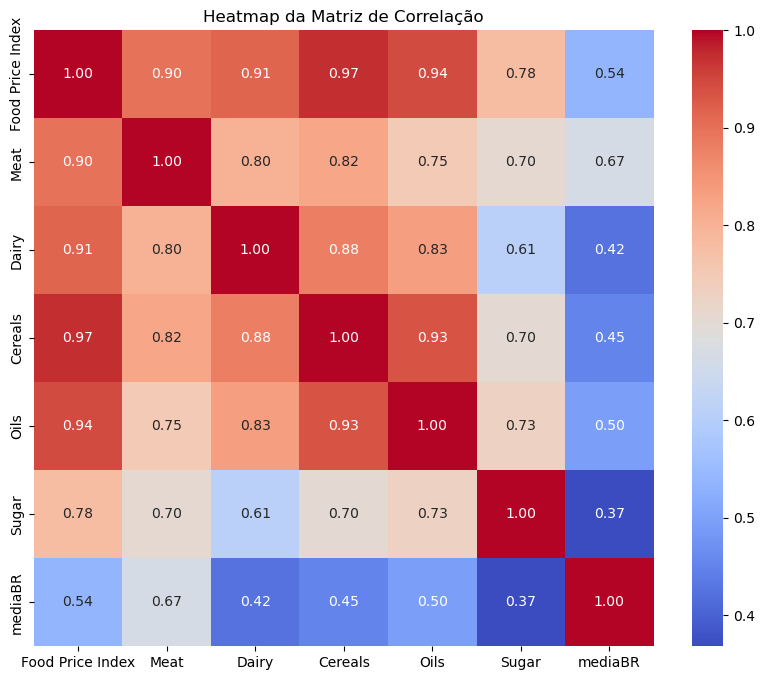

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap da Matriz de Correlação')
plt.show()